# Introduction
Welcome to the analysis of the Brazilian e-commerce dataset from Olist Store. This project aims to test several hypotheses to determine their statistical significance in relation to the broader population. By examining various aspects of the dataset, we hope to uncover insights that can benefit sellers on the e-commerce platform.

## Hypotheses

1. Influence of Payment Methods on Purchase Frequency:<br>
<br>
    - We hypothesize that certain payment methods are preferred by customers and lead to higher purchase frequency. Sellers can offer and promote these preferred payment methods to increase sales.<br>
<br>
2. Effect of Product Reviews on Sales:<br>
<br>
    - We hypothesize that products with higher review ratings have higher sales. Sellers can focus on improving product quality and encouraging satisfied customers to leave positive reviews to boost sales.<br>
<br>
3. Customer Loyalty and Repurchase Rates:<br>
<br>
   - We hypothesize that customers who leave positive reviews are more likely to make repeat purchases. Sellers can implement loyalty programs and follow-up strategies to encourage repeat business from satisfied customers.


# About the dataset

The dataset can be found on kaggle [click here to view dataset in kaggle](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce)

This dataset contains public information on orders made at Olist Store, a Brazilian e-commerce platform. It includes details of 100,000 orders from 2016 to 2018 across various marketplaces in Brazil.

While this dataset offers a comprehensive view of sales during that period, it does not cover the entire population of all possible sales data. Therefore, it is considered a **sample dataset**.

**Hypothesis testing** is essentially a method to determine if the observations from a sample can be generalized to the broader population. It helps to assess whether the patterns or effects seen in the sample data are likely to be true for the entire population or if they could have occurred by random chance.


  
### Accessing the data
The dataset consists of 8 csv files. I've imported these files into [DB Browser for SQLite](https://sqlitebrowser.org/) to query the data needed for each step and upload the files into my github repository to  be used in jupyter notebooks.

Please refer to the data schema below:

<div style="text-align: center;">
  <img src=https://i.imgur.com/HRhd2Y0.pngL" alt=Schemat" width=6300" height=5200" style="margin-left: 20px;">
</div>


## For our first hypothesis:
Influence of Payment Methods on Purchase Frequency:

- We hypothesize that certain payment methods are preferred by customers and lead to higher purchase frequency. Sellers can offer and promote these preferred payment methods to increase sales.

#### Data required:
##### from the olist_order_payments_dataset table:
 - order_id - unique identifier of an order.<br>
- payment_type - method of payment chosen by the customer.<br>
##### from the olist_order_customer_dataset table:
- customer_id - key to the orders dataset. Each order has a unique customer_id.<br>
- customer_unique_id - unique identifier of a customer.<br>
- customer_zip_code_prefix - first five digits of customer zip code<br>
- customer_city - customer city name<br>
- customer_state - customer state<br>
##### from the olist_orders_dataset table:
- customer_id - key to the customer dataset. Each order has a unique customer_id.<br>
- order_id - unique identifier of the order.
***
  
```sql
SELECT c.customer_unique_id, c.customer_id, o.order_id, p.payment_type, c.customer_zip_code_prefix,
       c.customer_city, c.customer_state
  FROM olist_customers_dataset as c
  LEFT JOIN olist_orders_dataset as o
    ON c.customer_id = o.customer_id
  LEFT JOIN olist_order_payments_dataset as p
    ON p.order_id = o.order_id
 lIMIT 5;
```
***

**Preview of the first 5 rows:**
<table>
  <thead>
    <tr>
      <th>customer_unique_id</th>
      <th>customer_id</th>
      <th>order_id</th>
      <th>payment_type</th>
      <th>customer_zip_code_prefix</th>
      <th>customer_city</th>
      <th>customer_state</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>861eff4711a542e4b93843c6dd7febb0</td>
      <td>06b8999e2fba1a1fbc88172c00ba8bc7</td>
      <td>00e7ee1b050b8499577073aeb2a297a1</td>
      <td>credit_card</td>
      <td>14409</td>
      <td>franca</td>
      <td>SP</td>
    </tr>
    <tr>
      <td>290c77bc529b7ac935b93aa66c333dc3</td>
      <td>18955e83d337fd6b2def6b18a428ac77</td>
      <td>29150127e6685892b6eab3eec79f59c7</td>
      <td>credit_card</td>
      <td>9790</td>
      <td>sao bernardo do campo</td>
      <td>SP</td>
    </tr>
    <tr>
      <td>060e732b5b29e8181a18229c7b0b2b5e</td>
      <td>4e7b3e00288586ebd08712fdd0374a03</td>
      <td>b2059ed67ce144a36e2aa97d2c9e9ad2</td>
      <td>credit_card</td>
      <td>1151</td>
      <td>sao paulo</td>
      <td>SP</td>
    </tr>
    <tr>
      <td>259dac757896d24d7702b9acbbff3f3c</td>
      <td>b2b6027bc5c5109e529d4dc6358b12c3</td>
      <td>951670f92359f4fe4a63112aa7306eba</td>
      <td>credit_card</td>
      <td>8775</td>
      <td>mogi das cruzes</td>
      <td>SP</td>
    </tr>
    <tr>
      <td>345ecd01c38d18a9036ed96c73b8d066</td>
      <td>4f2d8ab171c80ec8364f7c12e35b23ad</td>
      <td>6b7d50bd145f6fc7f33cebabd7e49d0f</td>
      <td>credit_card</td>
      <td>13056</td>
      <td>campinas</td>
      <td>SP</td>
    </tr>
  </tbody>
</table>


```sql
CREATE TABLE olis_data AS
SELECT c.customer_unique_id, c.customer_id, o.order_id, p.payment_type, c.customer_zip_code_prefix, c.customer_city, c.customer_state
  FROM olist_customers_dataset as c
  LEFT JOIN olist_orders_dataset as o
    ON c.customer_id = o.customer_id
  LEFT JOIN olist_order_payments_dataset as p
    ON p.order_id = o.order_id
```
Created a new table using the above query then exported it as a csv file.
the csv file is uploaded into my github repository to be used in jupyter notebook as a dataframe for our analysis.

In [2]:
import pandas as pd
olist_data = pd.read_csv("https://raw.githubusercontent.com/Mpakong/Marcel_Peter_Kong_Portfolio/refs/heads/main/projects/Brazilian%20E-Commerce%20Public%20Dataset%20by%20Olist%20(kaggle)/olis_data.csv")
olist_data.head()

,customer_unique_id,customer_id,order_id,payment_type,customer_zip_code_prefix,customer_city,customer_state
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,00e7ee1b050b8499577073aeb2a297a1,credit_card,14409,franca,SP
1,290c77bc529b7ac935b93aa66c333dc3,18955e83d337fd6b2def6b18a428ac77,29150127e6685892b6eab3eec79f59c7,credit_card,9790,sao bernardo do campo,SP
2,060e732b5b29e8181a18229c7b0b2b5e,4e7b3e00288586ebd08712fdd0374a03,b2059ed67ce144a36e2aa97d2c9e9ad2,credit_card,1151,sao paulo,SP
3,259dac757896d24d7702b9acbbff3f3c,b2b6027bc5c5109e529d4dc6358b12c3,951670f92359f4fe4a63112aa7306eba,credit_card,8775,mogi das cruzes,SP
4,345ecd01c38d18a9036ed96c73b8d066,4f2d8ab171c80ec8364f7c12e35b23ad,6b7d50bd145f6fc7f33cebabd7e49d0f,credit_card,13056,campinas,SP


In [45]:
olist_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103887 entries, 0 to 103886
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   customer_unique_id        103887 non-null  object
 1   customer_id               103887 non-null  object
 2   order_id                  103887 non-null  object
 3   payment_type              103886 non-null  object
 4   customer_zip_code_prefix  103887 non-null  int64 
 5   customer_city             103887 non-null  object
 6   customer_state            103887 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.5+ MB


In [50]:
states = olist_data['customer_state'].value_counts(normalize=True)*100
print(states)

customer_state
SP    41.990817
RJ    13.020878
MG    11.649196
RS     5.455928
PR     5.065119
SC     3.613542
BA     3.474929
DF     2.121536
GO     2.032978
ES     2.028165
PE     1.663346
CE     1.345693
PA     0.973173
MT     0.922156
MA     0.738302
MS     0.708462
PB     0.548673
PI     0.504394
RN     0.502469
AL     0.411024
SE     0.347493
TO     0.289738
RO     0.251235
AM     0.148238
AC     0.080857
AP     0.067381
RR     0.044279
Name: proportion, dtype: float64


In [49]:
print(len(states))

27


#### Observations:
- There are 27 states involved in the dataset
- 41.99% of the transactions came from SP
- 13.02% of the transactions came from RJ
- 11.64% of the transactions came from MG

In [53]:
# Calculate the percentage of each state
state_counts = olist_data['customer_state'].value_counts(normalize=True)

# Define your total sample size
total_sample_size = len(olist_data)  # Adjust this based on your needs

# Calculate the sample size for each state
state_sample_sizes = (state_counts * total_sample_size).round().astype(int)
print(state_sample_sizes)


customer_state
SP    43623
RJ    13527
MG    12102
RS     5668
PR     5262
SC     3754
BA     3610
DF     2204
GO     2112
ES     2107
PE     1728
CE     1398
PA     1011
MT      958
MA      767
MS      736
PB      570
PI      524
RN      522
AL      427
SE      361
TO      301
RO      261
AM      154
AC       84
AP       70
RR       46
Name: proportion, dtype: int32


In [54]:
print(103887*41.99)

4362215.13


In [55]:
print(olist_data['customer_state'].value_counts())

customer_state
SP    43623
RJ    13527
MG    12102
RS     5668
PR     5262
SC     3754
BA     3610
DF     2204
GO     2112
ES     2107
PE     1728
CE     1398
PA     1011
MT      958
MA      767
MS      736
PB      570
PI      524
RN      522
AL      427
SE      361
TO      301
RO      261
AM      154
AC       84
AP       70
RR       46
Name: count, dtype: int64


In [10]:
payment_types = (olist_data['payment_type'].value_counts(normalize=True)*100).sort_values()
print(payment_types)

payment_type
not_defined     0.002888
debit_card      1.471806
voucher         5.558978
boleto         19.043952
credit_card    73.922376
Name: proportion, dtype: float64


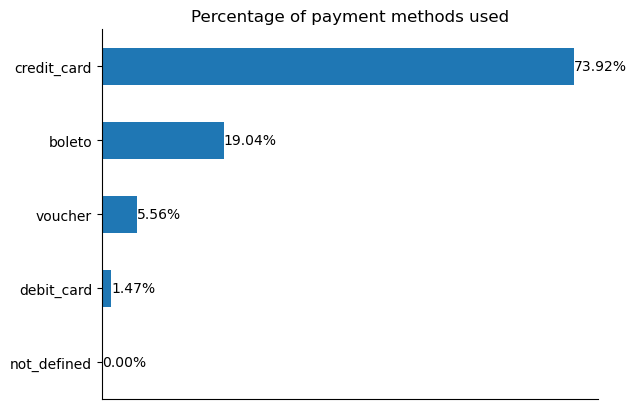

In [39]:
import matplotlib.pyplot as plt
ax = payment_types.plot.barh()
for index, value in enumerate(payment_types):
    ax.annotate(f'{value:.2f}%', xy=(value, index), va='center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks([])
plt.ylabel('')
plt.title('Percentage of payment methods used')
plt.show()

payment_type       boleto  credit_card  debit_card  not_defined   voucher
customer_state                                                           
AC              19.047619    72.619048    2.380952     0.000000  5.952381
AL              15.925059    79.859485    1.170960     0.000000  3.044496
AM              13.636364    80.519481    1.298701     0.000000  4.545455
AP              28.571429    67.142857    0.000000     0.000000  4.285714
BA              17.008310    73.739612    1.468144     0.000000  7.783934
CE              14.663805    78.040057    1.430615     0.000000  5.865522
DF              17.967332    77.132486    0.771325     0.000000  4.128857
ES              19.126720    74.655909    1.281443     0.000000  4.935928
GO              21.259470    71.969697    1.041667     0.000000  5.729167
MA              26.466754    69.752282    0.521512     0.000000  3.259452
MG              19.038176    74.946290    1.148570     0.000000  4.866964
MS              23.777174    70.516304

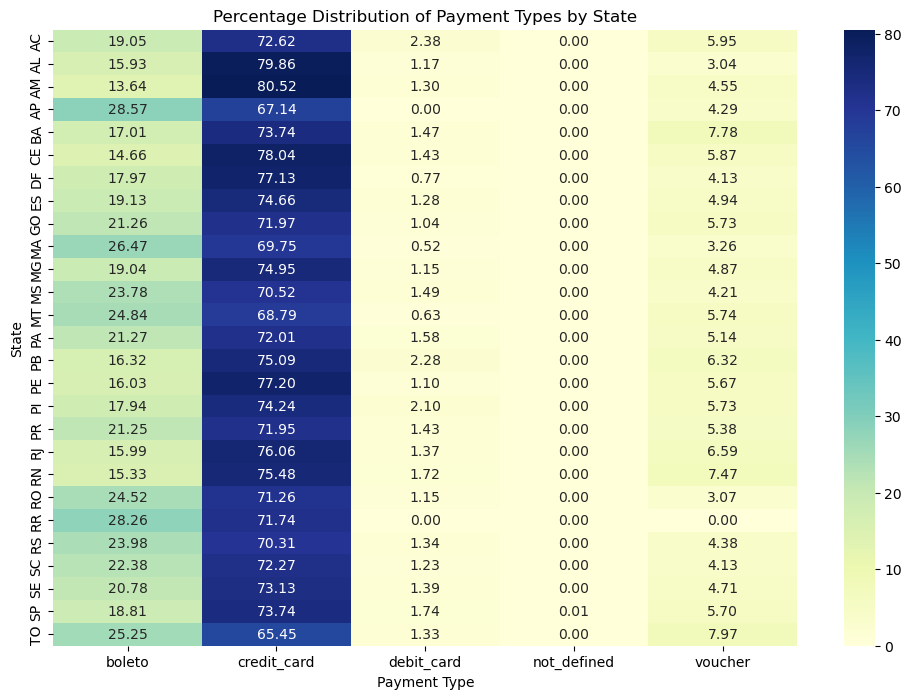

In [56]:
cross_tab = pd.crosstab(olist_data['customer_state'], olist_data['payment_type'], normalize='index') * 100

# Display the cross-tabulation
print(cross_tab)

# Optionally, you can visualize the cross-tabulation using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Percentage Distribution of Payment Types by State')
plt.xlabel('Payment Type')
plt.ylabel('State')
plt.show()
